In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:/Users/tmkonto/Downloads/MKONTO/Essex/Machine Learning/Data Sets/AirBnB NYC/AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
#Checking for Null Values in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
#Checking how many Null Values are in each of the columns 
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#From the results, over 10k listings do not have reviews. Will this have a bearing on our ML algorithm if we use last_review and reviews_per_month

In [6]:
df.describe(include ='all').round(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48879,4.889500e+04,48874,48895,48895,48895.00,48895.00,48895,48895.00,48895.00,48895.00,38843,38843.00,48895.00,48895.00
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,19017143.24,NaN,6.762001e+07,NaN,NaN,NaN,40.73,-73.95,NaN,152.72,7.03,23.27,NaN,1.37,7.14,112.78
std,10983108.39,NaN,7.861097e+07,NaN,NaN,NaN,0.05,0.05,NaN,240.15,20.51,44.55,NaN,1.68,32.95,131.62
min,2539.00,NaN,2.438000e+03,NaN,NaN,NaN,40.50,-74.24,NaN,0.00,1.00,0.00,NaN,0.01,1.00,0.00
25%,9471945.00,NaN,7.822033e+06,NaN,NaN,NaN,40.69,-73.98,NaN,69.00,1.00,1.00,NaN,0.19,1.00,0.00
50%,19677284.00,NaN,3.079382e+07,NaN,NaN,NaN,40.72,-73.96,NaN,106.00,3.00,5.00,NaN,0.72,1.00,45.00
75%,29152178.50,NaN,1.074344e+08,NaN,NaN,NaN,40.76,-73.94,NaN,175.00,5.00,24.00,NaN,2.02,2.00,227.00


In [7]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [8]:
df.sort_values(by="price", ascending =False).head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,NaN,12,146
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,NaN,1,364


In [9]:
#Checking Correlation
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


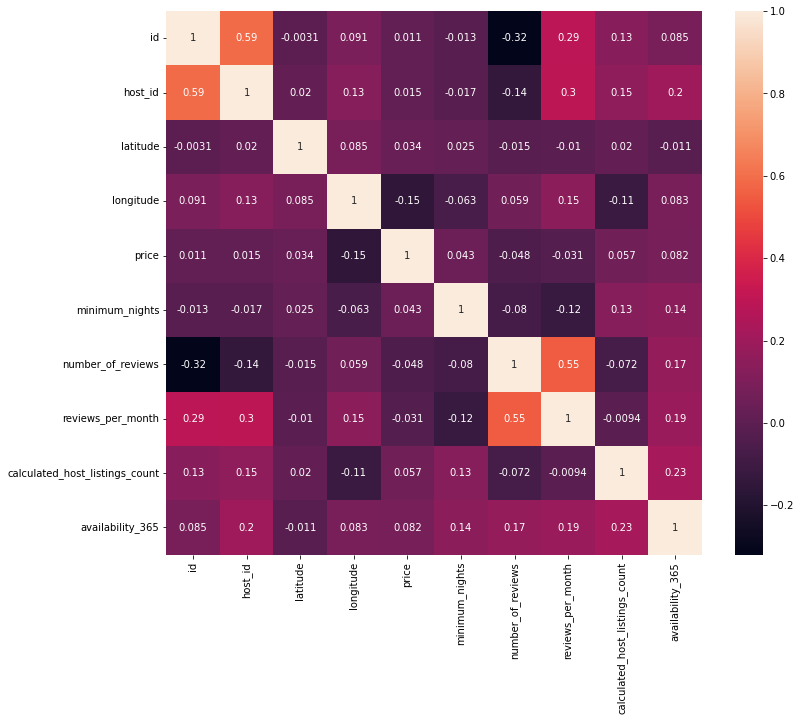

In [10]:
plt.figure(figsize=(12, 10))


sns.heatmap(df.corr(), annot =True)

plt.show()


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

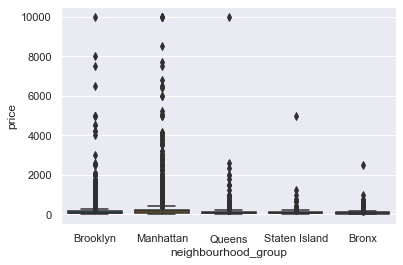

In [13]:
#Check price between neighbourhoods 
ax = sns.boxplot(data = df,
                x = 'neighbourhood_group' ,
                y = 'price' , 
                palette = 'colorblind')

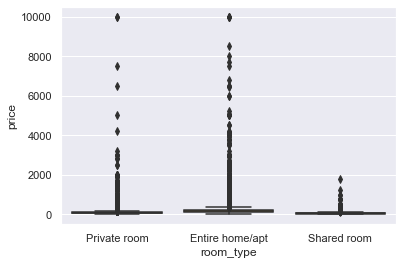

In [14]:
#Compare price and room type
ax = sns.boxplot(data = df,
                x = 'room_type' ,
                y = 'price' , 
                palette = 'colorblind')


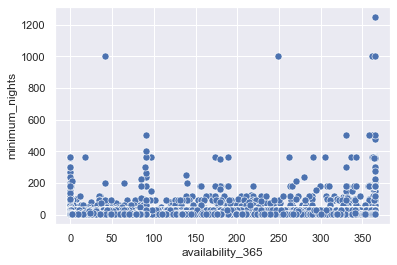

In [54]:
#Compare price and availability 
ax = sns.scatterplot(data = df, 
                     x = 'availability_365', 
                     y = 'minimum_nights',
                     s = 50)


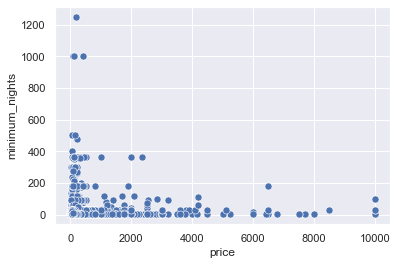

In [22]:
#Compare price and minimum nights
ax = sns.scatterplot(data = df, 
                     x = 'price', 
                     y = 'minimum_nights',
                     s = 50)

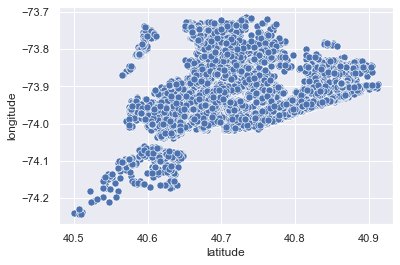

In [31]:
#location of listings
ax = sns.scatterplot(data = df, 
                     x = 'latitude', 
                     y = 'longitude',
                     s = 50)

In [32]:
df[['price', 'latitude', 'longitude']].describe().round(2)

,price,latitude,longitude
count,48895.00,48895.00,48895.00
mean,152.72,40.73,-73.95
std,240.15,0.05,0.05
min,0.00,40.50,-74.24
25%,69.00,40.69,-73.98
50%,106.00,40.72,-73.96
75%,175.00,40.76,-73.94
max,10000.00,40.91,-73.71


In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
df_scaled = scaler.fit_transform(df[['price', 'latitude', 'longitude']]) #coverts to a numpy array

In [36]:
df_scaled = pd.DataFrame(df_scaled, columns = ['price', 'latitude', 'longitude'])

In [37]:
df_scaled.describe().round(2)

,price,latitude,longitude
count,48895.00,48895.00,48895.00
mean,-0.00,0.00,0.00
std,1.00,1.00,1.00
min,-0.64,-4.20,-6.33
25%,-0.35,-0.71,-0.67
50%,-0.19,-0.11,-0.08
75%,0.09,0.63,0.34
max,41.00,3.38,5.18


In [43]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, n_init = 25, random_state = 1234)

In [44]:
km.fit(df_scaled)

KMeans(n_clusters=4, n_init=25, random_state=1234)

In [45]:
km.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [46]:
km.inertia_

67134.05177349455

In [47]:
pd.Series(km.labels_).value_counts().sort_index() #number of values in cluster

0    17260
1     3584
2    27972
3       79
dtype: int64

In [48]:
km.cluster_centers_

array([[ 0.05660501,  1.03413468, -0.07437333],
       [-0.25363585, -0.18589238,  2.50492159],
       [-0.05313166, -0.6195676 , -0.27404064],
       [17.83187466,  0.14213609, -0.50006253]])

In [49]:
cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['price', 'latitude', 'longitude'])
cluster_centers

,price,latitude,longitude
0,0.056605,1.034135,-0.074373
1,-0.253636,-0.185892,2.504922
2,-0.053132,-0.619568,-0.274041
3,17.831875,0.142136,-0.500063


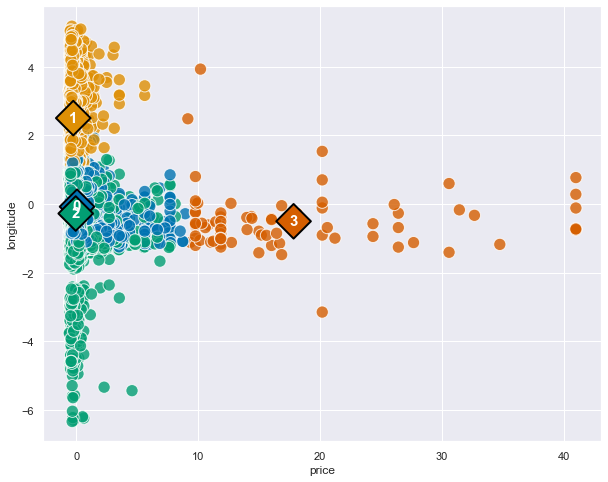

In [55]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = df_scaled,
                     x = 'price',
                     y = 'longitude',
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'price',
                     y = 'longitude', 
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.price[i], 
                        y = cluster_centers.longitude[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [56]:
#Group data by neighbourhood_group 
df.groupby('neighbourhood_group').mean().sort_values(by ='price', ascending =False)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Manhattan,1.877494e+07,6.783062e+07,40.765062,-73.974607,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410
Brooklyn,1.825685e+07,5.671526e+07,40.685036,-73.951190,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292
Staten Island,2.159747e+07,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284
Queens,2.175500e+07,9.615680e+07,40.731531,-73.872775,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818
Bronx,2.273492e+07,1.056099e+08,40.848305,-73.884552,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937


In [18]:
#Manhattan appears to on average have the highest price per unit and highest number of reviews. Next step is to explore Manhattan data

In [59]:
df[df['neighbourhood_group'].str.contains('Manhattan', 'Brooklyn')]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [61]:
manbrook = df[df['neighbourhood_group'].str.contains('Manhattan', 'Brooklyn')]

In [64]:
manbrook.describe( include = 'all').round(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,21661.00,21652,2.166100e+04,21652,21661,21661,21661.00,21661.00,21661,21661.00,21661.00,21661.00,16632,16632.00,21661.00,21661.00
unique,NaN,21264,NaN,5972,1,32,NaN,NaN,3,NaN,NaN,NaN,1565,NaN,NaN,NaN
top,NaN,Harlem Gem,NaN,Sonder (NYC),Manhattan,Harlem,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,7,NaN,327,21661,2658,NaN,NaN,13199,NaN,NaN,NaN,599,NaN,NaN,NaN
mean,18774939.21,NaN,6.783062e+07,NaN,NaN,NaN,40.77,-73.97,NaN,196.88,8.58,20.99,NaN,1.27,12.79,111.98
std,11167932.02,NaN,7.936435e+07,NaN,NaN,NaN,0.04,0.02,NaN,291.38,24.05,42.57,NaN,1.63,48.23,132.68
min,2595.00,NaN,2.845000e+03,NaN,NaN,NaN,40.70,-74.02,NaN,0.00,1.00,0.00,NaN,0.01,1.00,0.00
25%,9162161.00,NaN,8.525424e+06,NaN,NaN,NaN,40.73,-73.99,NaN,95.00,1.00,1.00,NaN,0.17,1.00,0.00
50%,19116844.00,NaN,3.065628e+07,NaN,NaN,NaN,40.76,-73.98,NaN,150.00,3.00,4.00,NaN,0.61,1.00,36.00
75%,29541214.00,NaN,1.069498e+08,NaN,NaN,NaN,40.80,-73.95,NaN,220.00,6.00,19.00,NaN,1.89,2.00,230.00


In [65]:
manbrook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21661 entries, 1 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21661 non-null  int64  
 1   name                            21652 non-null  object 
 2   host_id                         21661 non-null  int64  
 3   host_name                       21652 non-null  object 
 4   neighbourhood_group             21661 non-null  object 
 5   neighbourhood                   21661 non-null  object 
 6   latitude                        21661 non-null  float64
 7   longitude                       21661 non-null  float64
 8   room_type                       21661 non-null  object 
 9   price                           21661 non-null  int64  
 10  minimum_nights                  21661 non-null  int64  
 11  number_of_reviews               21661 non-null  int64  
 12  last_review                     

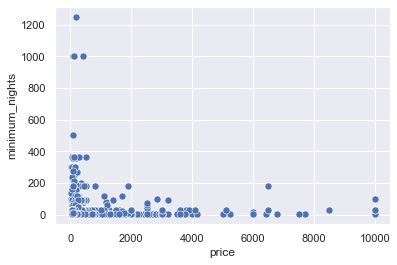

In [70]:
#Compare price and minimum_nights
ax = sns.scatterplot(data = manbrook, 
                     x = 'price', 
                     y = 'minimum_nights',
                     s = 50)

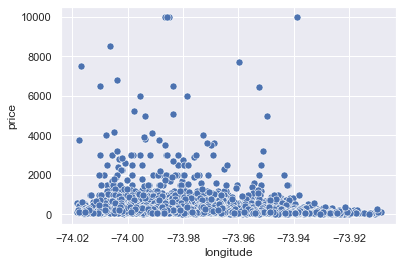

In [76]:
ax = sns.scatterplot(data = manbrook, 
                     x = 'longitude', 
                     y = 'price',
                     s = 50)

In [80]:
manbrook[['availability_365', 'number_of_reviews', 'minimum_nights', 'price', 'longitude', 'latitude','room_type','neighbourhood_group']].describe().round(2)

,availability_365,number_of_reviews,minimum_nights,price,longitude,latitude
count,21661.00,21661.00,21661.00,21661.00,21661.00,21661.00
mean,111.98,20.99,8.58,196.88,-73.97,40.77
std,132.68,42.57,24.05,291.38,0.02,0.04
min,0.00,0.00,1.00,0.00,-74.02,40.70
25%,0.00,1.00,1.00,95.00,-73.99,40.73
50%,36.00,4.00,3.00,150.00,-73.98,40.76
75%,230.00,19.00,6.00,220.00,-73.95,40.80
max,365.00,607.00,1250.00,10000.00,-73.91,40.88


In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [83]:
manbrook_scaled = scaler.fit_transform(manbrook[['availability_365', 'number_of_reviews', 'minimum_nights', 'price', 'longitude', 'latitude']]) #coverts to a numpy array

In [85]:
#now convert the numpy array to a dataframe 
manbrook_scaled = pd.DataFrame(manbrook_scaled, columns = ['availability_365', 'number_of_reviews', 'minimum_nights', 'price', 'longitude', 'latitude'])

In [86]:
#Now let's get summary statistics for the customers_scaled data frame
manbrook_scaled.describe().round(2)

,availability_365,number_of_reviews,minimum_nights,price,longitude,latitude
count,21661.00,21661.00,21661.00,21661.00,21661.00,21661.00
mean,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.84,-0.49,-0.32,-0.68,-1.98,-1.63
25%,-0.84,-0.47,-0.32,-0.35,-0.77,-0.86
50%,-0.57,-0.40,-0.23,-0.16,-0.26,-0.11
75%,0.89,-0.05,-0.11,0.08,0.94,0.78
max,1.91,13.77,51.62,33.64,2.98,2.90


In [91]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 4, n_init = 25, random_state = 1234)

In [92]:
km.fit(manbrook_scaled)

KMeans(n_clusters=4, n_init=25, random_state=1234)

In [93]:
km.labels_

array([0, 2, 2, ..., 2, 1, 1])

In [94]:
km.cluster_centers_

array([[ 1.38240279, -0.25542948,  0.51971987,  0.40001587, -0.46327312,
        -0.43309349],
       [-0.64056509, -0.23259524, -0.15775902,  0.00329003, -0.68466805,
        -0.67387011],
       [-0.28069385, -0.14257215, -0.1314936 , -0.25669524,  1.15663739,
         1.12579522],
       [ 0.46841262,  3.20023691, -0.22223028, -0.15477092,  0.03512454,
         0.01597885]])

In [97]:
cluster_centers = pd.DataFrame(km.cluster_centers_, 
                               columns = ['availability_365', 'number_of_reviews', 'minimum_nights', 'price', 'longitude', 'latitude' ])
cluster_centers

,availability_365,number_of_reviews,minimum_nights,price,longitude,latitude
0,1.382403,-0.255429,0.519720,0.400016,-0.463273,-0.433093
1,-0.640565,-0.232595,-0.157759,0.003290,-0.684668,-0.673870
2,-0.280694,-0.142572,-0.131494,-0.256695,1.156637,1.125795
3,0.468413,3.200237,-0.222230,-0.154771,0.035125,0.015979


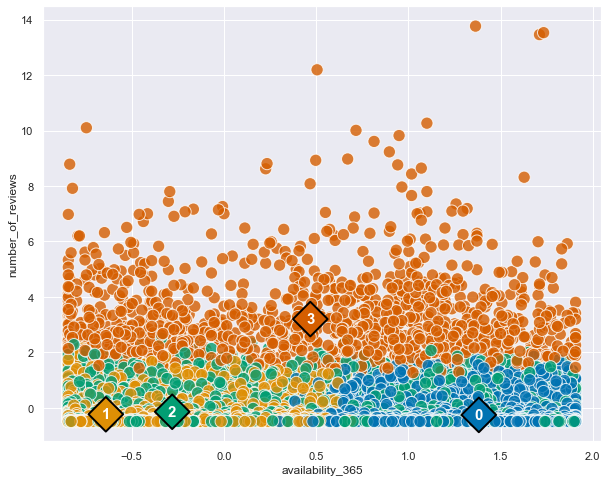

In [106]:
# Set the figure size
plt.figure(figsize=(10, 8))

#Plot the Clusters
ax = sns.scatterplot(data = manbrook_scaled,
                     x = 'availability_365',
                     y = 'number_of_reviews', 
                     hue = km.labels_, 
                     palette = 'colorblind', 
                     alpha = 0.8, 
                     s = 150,
                     legend = False)

#Plot the Centroids
ax = sns.scatterplot(data = cluster_centers, 
                     x = 'availability_365',
                     y = 'number_of_reviews',  
                     hue = cluster_centers.index, 
                     palette = 'colorblind', 
                     s = 600,
                     marker = 'D',
                     ec = 'black', 
                     legend = False)

# Add Centroid Labels
for i in range(len(cluster_centers)):
               plt.text(x = cluster_centers.availability_365[i], 
                        y = cluster_centers.number_of_reviews[i],
                        s = i, 
                        horizontalalignment='center',
                        verticalalignment='center',
                        size = 15,
                        weight = 'bold',
                        color = 'white')

In [21]:
df3.transpose()

neighbourhood_group,Manhattan,Brooklyn,Staten Island,Queens,Bronx
price,196.875814,124.383207,114.812332,99.517649,87.496792
availability_365,111.979410,100.232292,199.678284,144.451818,165.758937


<AxesSubplot:xlabel='neighbourhood_group'>

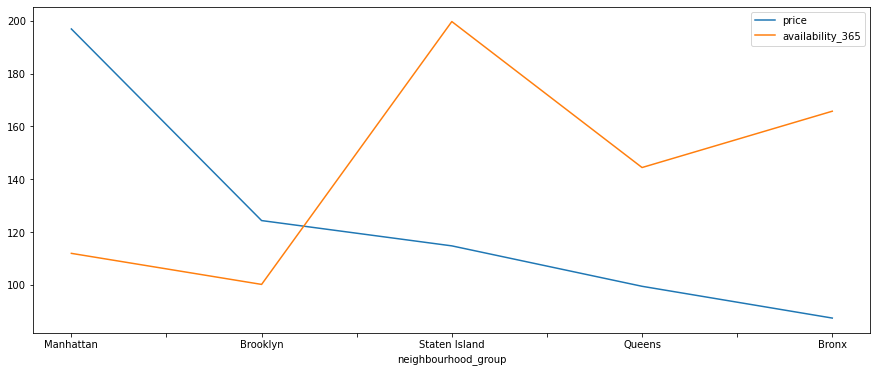

In [22]:
df3.plot()

In [23]:
#Exploring Manhattan further on price
dfmanhat = df2[df2['neighbourhood_group'].str.contains('Manhattan')]

<AxesSubplot:>

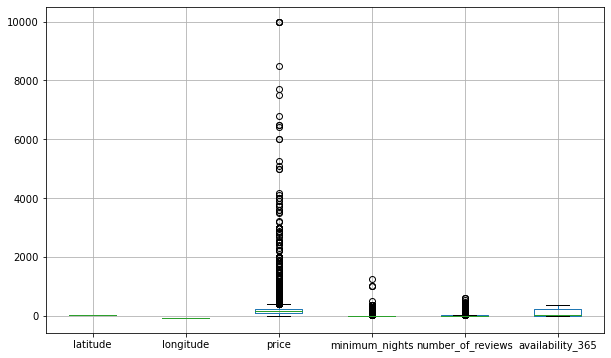

In [24]:
dfmanhat.boxplot(figsize =(10,6))

In [26]:
dfmanhat.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'availability_365'],
      dtype='object')

In [27]:
#Checking to see the most common room type in Manhantan
most_common_room_type = dfmanhat['room_type'].mode().iloc[0]
print(f'Most Common Room Type:{most_common_room_type}')

Most Common Room Type:Entire home/apt


In [28]:
dfmanhat.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
count,21661.000000,21661.000000,21661.000000,21661.000000,21661.000000,21661.000000
mean,40.765062,-73.974607,196.875814,8.579151,20.985596,111.979410
std,0.038463,0.022138,291.383183,24.050857,42.572277,132.677836
min,40.702340,-74.018510,0.000000,1.000000,0.000000,0.000000
25%,40.731820,-73.991690,95.000000,1.000000,1.000000,0.000000
50%,40.760880,-73.980420,150.000000,3.000000,4.000000,36.000000
75%,40.795090,-73.953840,220.000000,6.000000,19.000000,230.000000
max,40.876650,-73.908550,10000.000000,1250.000000,607.000000,365.000000


In [33]:
#What are the top boroughs with the most listings in Manhantan 
top_borough = dfmanhat['neighbourhood'].value_counts().head(10)
print('Top Borough by listing count:')
print(top_borough)

Top Borough by listing count:
Harlem                2658
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Midtown               1545
East Harlem           1117
Chelsea               1113
Lower East Side        911
Washington Heights     899
Name: neighbourhood, dtype: int64


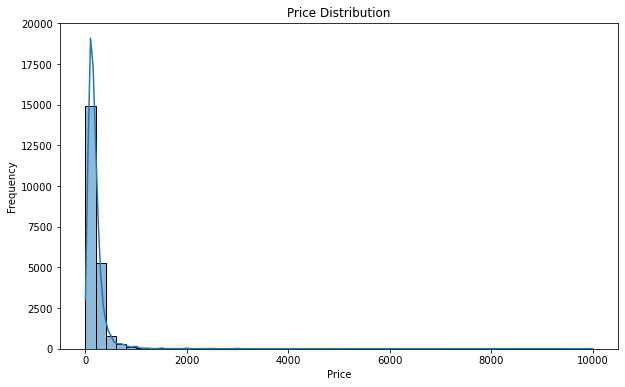

In [34]:
#Price distribution of listings in Manhatan 
plt.figure(figsize=(10, 6))
sns.histplot(dfmanhat['price'], bins=50, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

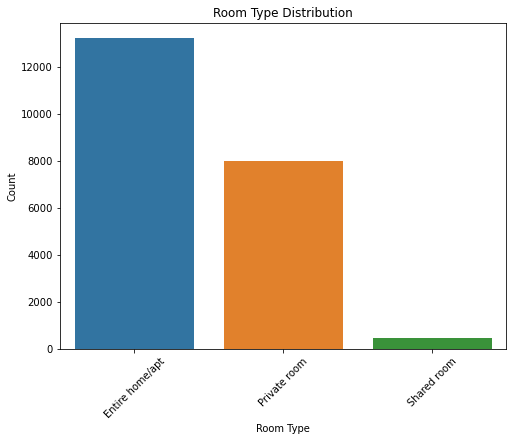

In [35]:
#Room Types found in Manhattan 
plt.figure(figsize=(8, 6))
sns.countplot(data=dfmanhat, x='room_type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.xticks(rotation=45)
plt.show()

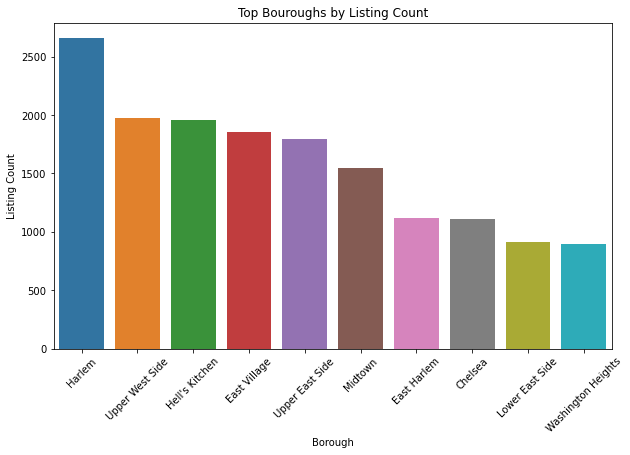

In [39]:
#The top Bouroughs by Listing count
plt.figure(figsize=(10, 6))
sns.barplot(x=top_borough.index, y=top_borough.values)
plt.xlabel('Borough')
plt.ylabel('Listing Count')
plt.title('Top Bouroughs by Listing Count')
plt.xticks(rotation=45)
plt.show()

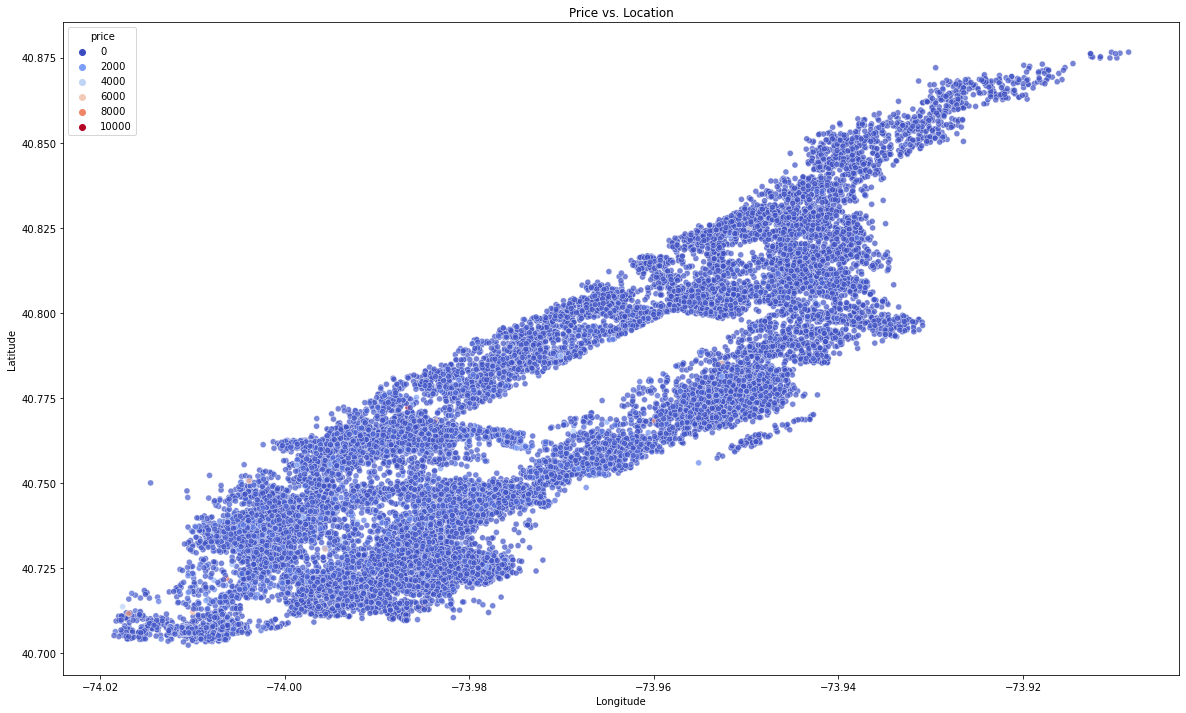

In [44]:
#Visualizing the relationship between price and location in Manhattan
plt.figure(figsize=(20, 12))
sns.scatterplot(data=dfmanhat, x='longitude', y='latitude', hue='price', palette='coolwarm', alpha=0.7)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price vs. Location')
plt.show()